## Data Wrangling

#### Data Set Information:

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. <br /> It includes over 50 features representing patient and hospital outcomes. <br />Information was extracted from the database for encounters that satisfied the following criteria.<br /> 
(1) It is an inpatient encounter (a hospital admission).<br /> 
(2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.<br /> 
(3) The length of stay was at least 1 day and at most 14 days.<br /> 
(4) Laboratory tests were performed during the encounter.<br /> 
(5) Medications were administered during the encounter.<br /> 
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc. <br/>
https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008

#### Imports

In [1]:
import pandas as pd
import numpy as np

#### Load The Diabetic Data

In [2]:
#This data had missing values coded as '?', so converting these to NaN 
diabetic_data = pd.read_csv('../raw_data/diabetic_data.csv', na_values='?', low_memory=False)
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
print('Diabetes data set dimensions : ',diabetic_data.shape)
print(diabetic_data.info())

Diabetes data set dimensions :  (101766, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures

### Missing values

Count the number of missing values in each column and sort them.

In [4]:
missing_data = pd.concat([diabetic_data.isnull().sum(), 100 * diabetic_data.isnull().mean()], axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by='count')

,count,%
encounter_id,0,0.000000
chlorpropamide,0,0.000000
glimepiride,0,0.000000
acetohexamide,0,0.000000
glipizide,0,0.000000
glyburide,0,0.000000
tolbutamide,0,0.000000
pioglitazone,0,0.000000
rosiglitazone,0,0.000000
acarbose,0,0.000000


Weight attribute was removed as it had about 97% of the data missing. <br /> 
Payer code (corresponded to the payer used for the patient’s insurance) was removed since it had about 40% of missing values and was not considered relevant to the outcome

In [5]:
diabetic_data.drop(['weight', 'payer_code'], axis=1,inplace=True)

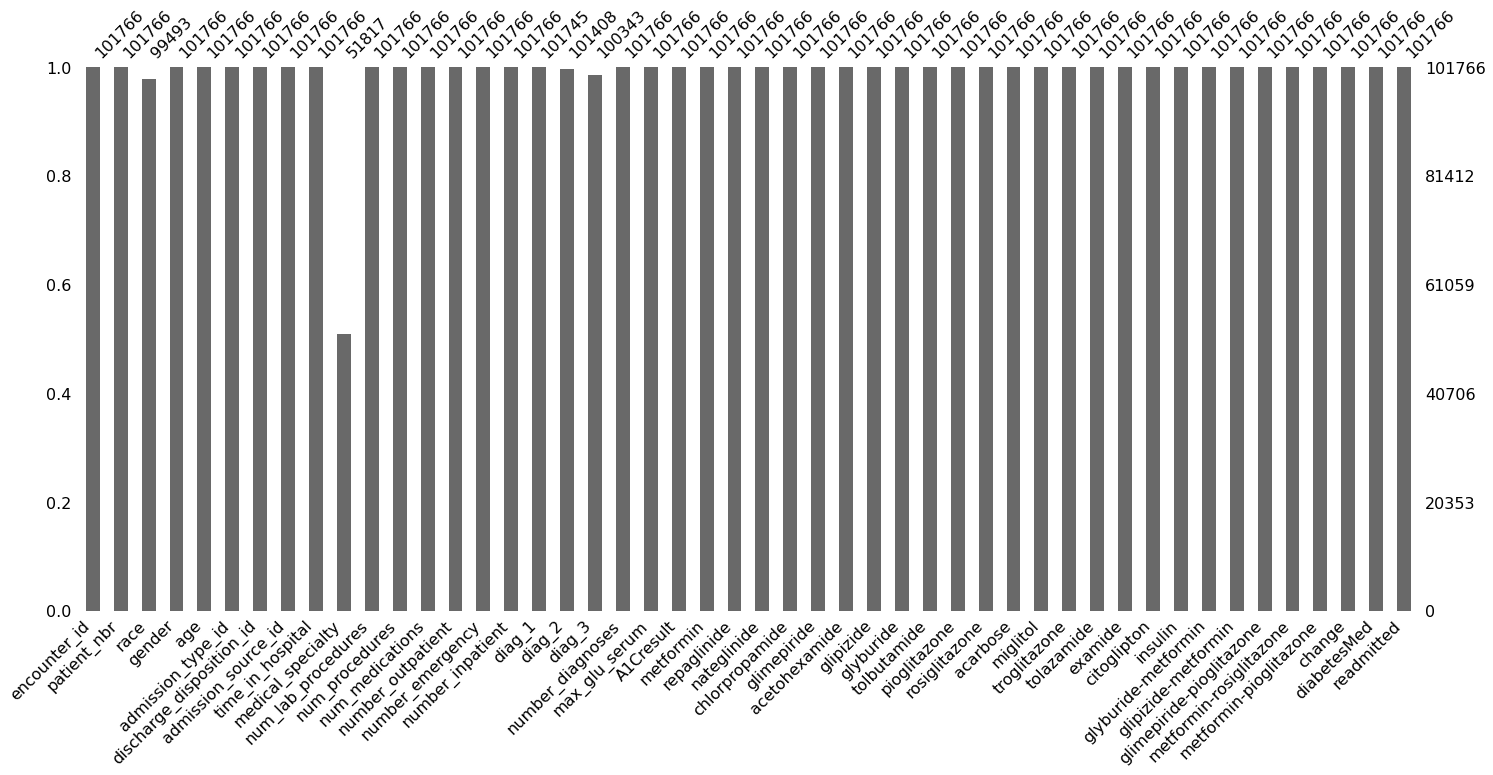

In [6]:
import missingno as msno
msno.bar(diabetic_data);

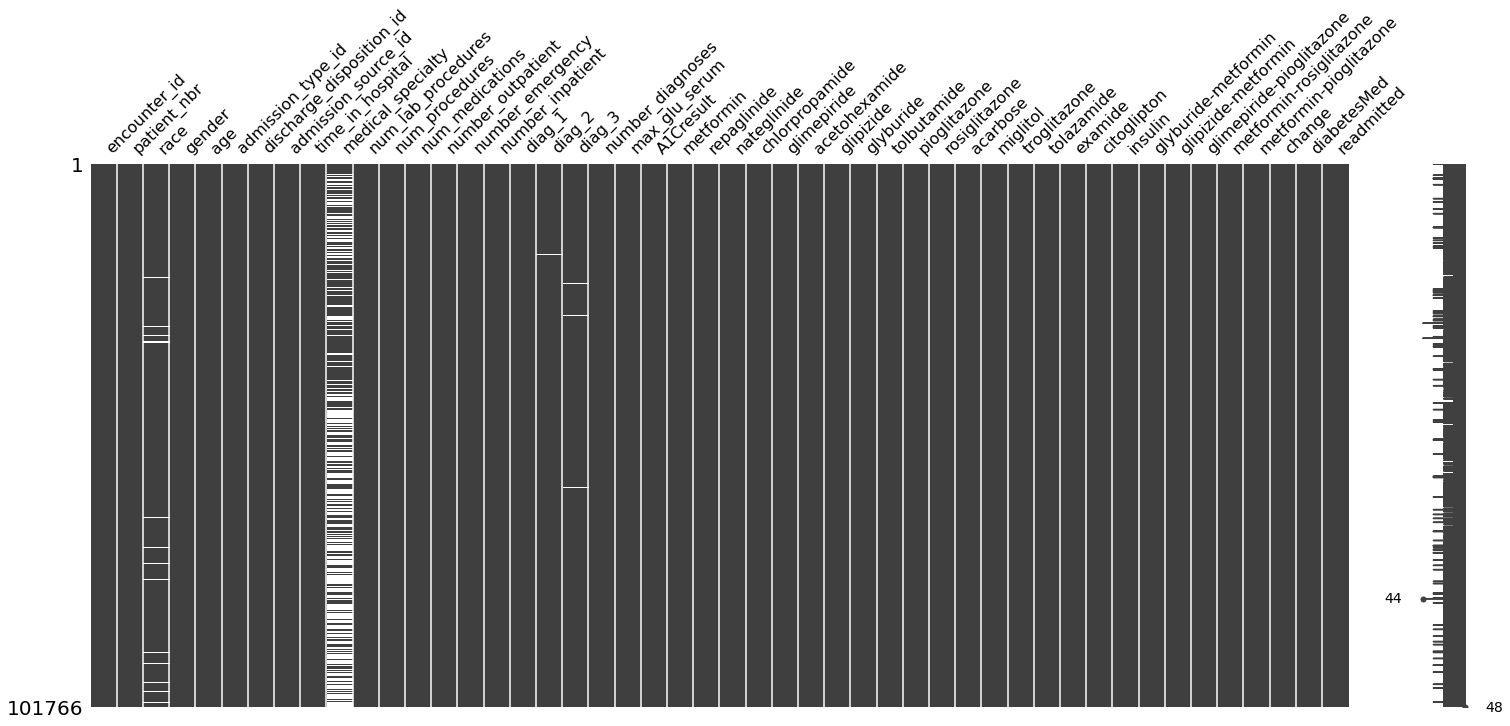

In [7]:
msno.matrix(diabetic_data);

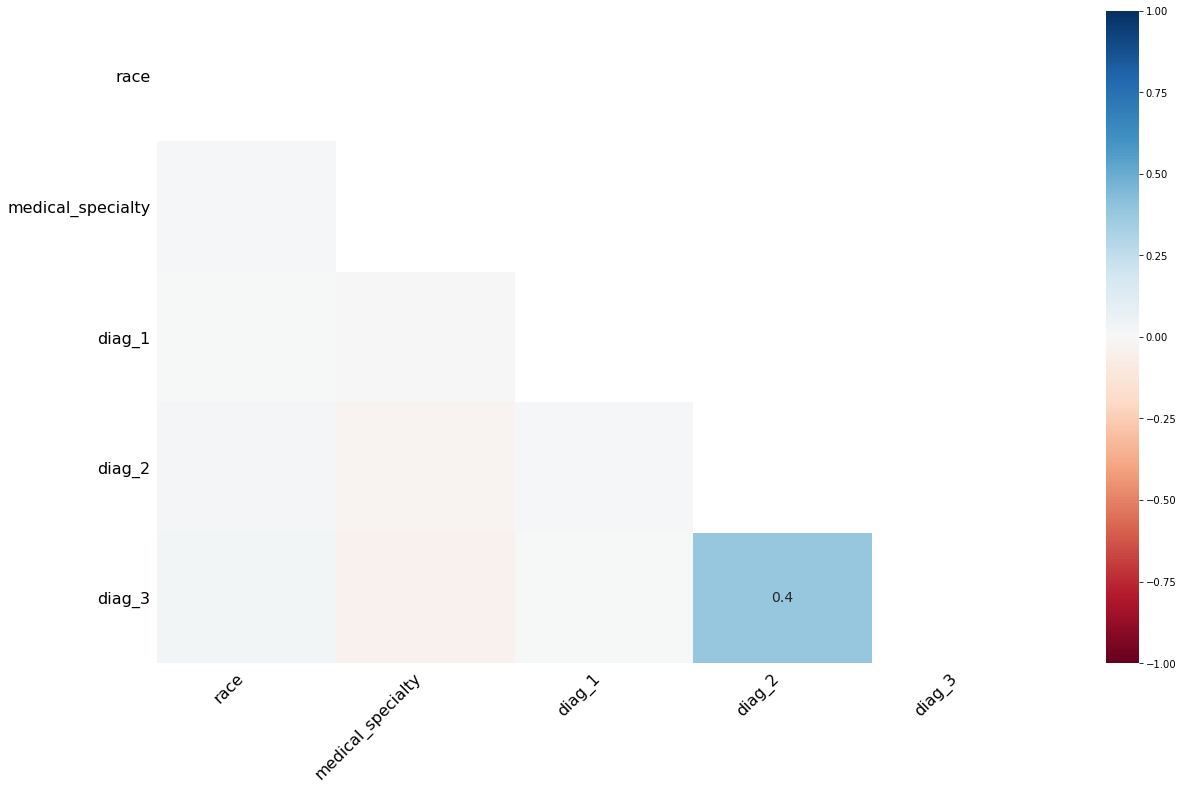

In [8]:
msno.heatmap(diabetic_data);

The highest correlation is between diag_2 and diag_3 which is 0.4. This confirms our intuition from the missing values matrix as these columns have missing values in the same rows.

#### Cleaning up observations after analyzing the above plots
medical_specialty - fill missing values to 'missing' <br /> 
race -  fill missing values with 'missing'<br /> 
diag_1 - Remove missing values<br /> 
diag_2 - Remove missing values<br /> 
diag_3 - Remove missing values<br /> 

In [9]:
print('race values :', diabetic_data['race'].unique())
print('race value counts :', diabetic_data['race'].value_counts(dropna=False))
print()

print('medical speciality values :', diabetic_data['medical_specialty'].unique())

race values : ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
race value counts : Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

medical speciality values : ['Pediatrics-Endocrinology' nan 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesthesiology-Pediatric'
 'Radiology' 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-

In [10]:
values = {'medical_specialty': 'missing', 'race': 'missing'}
diabetic_data.fillna(value=values, inplace=True)

diabetic_data.dropna(subset=['diag_1', 'diag_2', 'diag_3'], how='any', inplace=True)

In [11]:
#Remove symbols from age
special_char = ['[', ')']
for c in special_char:
    diabetic_data['age'] = diabetic_data['age'].str.replace(c, '', regex=False)

In [12]:
print('Diabetes data set dimensions : ',diabetic_data.shape)

Diabetes data set dimensions :  (100244, 48)


#### Variable - gender
Dropping the 3 Unknown/Invalid data

In [13]:
print(diabetic_data['gender'].value_counts())
diabetic_data.drop(diabetic_data[diabetic_data['gender'] == 'Unknown/Invalid'].index , inplace=True)

Female             53922
Male               46319
Unknown/Invalid        3
Name: gender, dtype: int64


#### Variable - admission_id  
Mapping the numbers to the correct admission type

In [14]:
print(diabetic_data['admission_type_id'].value_counts())

1    53230
3    18544
2    18203
6     5199
5     4719
8      315
7       21
4       10
Name: admission_type_id, dtype: int64


In [15]:
admission_type = pd.read_csv('../raw_data/IDs_mapping.csv', nrows=8)
admission_type

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [16]:
admission_type.isnull().sum()

admission_type_id    0
description          1
dtype: int64

In [17]:
admission_type['description'] = admission_type['description'].replace(np.nan, 'missing')

In [18]:
admission_type.columns = ['admission_type_id', 'admission_type']
diabetic_data = diabetic_data.merge(admission_type, on='admission_type_id')

In [19]:
print(diabetic_data['admission_type'].value_counts())

Emergency        53230
Elective         18544
Urgent           18203
missing           5199
Not Available     4719
Not Mapped         315
Trauma Center       21
Newborn             10
Name: admission_type, dtype: int64


#### Variable - discharge_disposition_id

In [20]:
print(diabetic_data['discharge_disposition_id'].value_counts())

1     59003
3     13897
6     12830
18     3642
2      2115
22     1981
11     1640
5      1167
25      956
4       805
7       604
23      406
13      398
14      371
28      138
8       107
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64


In [21]:
discharge_disposition = pd.read_csv('../raw_data/IDs_mapping.csv', skiprows=10,nrows=30)
discharge_disposition

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


In [22]:
discharge_disposition.isnull().sum()

discharge_disposition_id    0
description                 1
dtype: int64

In [23]:
discharge_disposition['description'] = discharge_disposition['description'].replace(np.nan, 'missing')

In [24]:
discharge_disposition.columns = ['discharge_disposition_id', 'discharge_disposition']
diabetic_data = diabetic_data.merge(discharge_disposition, on='discharge_disposition_id')

In [25]:
print(diabetic_data['discharge_disposition'].value_counts())

Discharged to home                                                                                           59003
Discharged/transferred to SNF                                                                                13897
Discharged/transferred to home with home health service                                                      12830
missing                                                                                                       3642
Discharged/transferred to another short term hospital                                                         2115
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1981
Expired                                                                                                       1640
Discharged/transferred to another type of inpatient care institution                                          1167
Not Mapped                                                                      

#### Variable - admission_source_id

In [26]:
print(diabetic_data['admission_source_id'].value_counts())

7     56797
1     29035
17     6683
4      3144
6      2144
2      1092
5       852
3       179
20      161
9       112
8        15
22       12
10        8
14        2
11        2
25        2
13        1
Name: admission_source_id, dtype: int64


In [27]:
admission_source = pd.read_csv('../raw_data/IDs_mapping.csv', skiprows=42,nrows=26)
admission_source

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


In [28]:
admission_source.isnull().sum()

admission_source_id    0
description            1
dtype: int64

In [29]:
admission_source['description'] = admission_source['description'].replace(np.nan, 'missing')

In [30]:
admission_source.columns = ['admission_source_id', 'admission_source']
diabetic_data = diabetic_data.merge(admission_source, on='admission_source_id')

In [31]:
print(diabetic_data['admission_source'].value_counts())

 Emergency Room                                               56797
 Physician Referral                                           29035
missing                                                        6683
Transfer from a hospital                                       3144
 Transfer from another health care facility                    2144
Clinic Referral                                                1092
 Transfer from a Skilled Nursing Facility (SNF)                 852
HMO Referral                                                    179
 Not Mapped                                                     161
 Not Available                                                  112
 Court/Law Enforcement                                           15
 Transfer from hospital inpt/same fac reslt in a sep claim       12
 Transfer from critial access hospital                            8
 Extramural Birth                                                 2
Normal Delivery                                 

#### Drop columns - admission_type_id, discharge_disposition_id, admission_source_id as the information is captured in admission_type, discharge_disposition and admission_source

In [32]:
diabetic_data.drop([ 'admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis=1,inplace=True)

#### Remove duplicate data

In [33]:
# some patients have multiple encounters 
diabetic_data['patient_nbr'].value_counts()

88785891    39
23199021    23
1660293     23
88227540    23
23643405    22
            ..
56390931     1
25382007     1
60114393     1
59272101     1
87775947     1
Name: patient_nbr, Length: 70413, dtype: int64

In [34]:
diabetic_data.drop_duplicates(subset=['patient_nbr'], inplace=True)

In [35]:
diabetic_data['patient_nbr'].value_counts()

55629189     1
20717019     1
4804848      1
50814945     1
20006055     1
            ..
38742624     1
92129778     1
108080856    1
30086271     1
87775947     1
Name: patient_nbr, Length: 70413, dtype: int64

#### Variable - readmitted -- The target variable

Hospital readmission is defined as patient admission to a hospital within 30 days after being discharged from an earlier hospital stay.
readmitted has 3 values - NO, <30, >30 

In [36]:
diabetic_data['readmitted'].value_counts()

NO     45076
>30    19758
<30     5579
Name: readmitted, dtype: int64

In [37]:
diabetic_data.shape

(70413, 48)

In [38]:
diabetic_data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [39]:
# save the data to a new csv file
diabetic_data.to_csv('../data/diabetic_data_cleaned_2.csv', index=False)